## Importing Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

## Loading Data

In [2]:
df = pd.read_excel('dataset_FINAL_afterPreprocessing.xlsx')
df.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Topik,Text,Label 1,Label 2,Label 3,LabelFinal,...,DisplayName,Location,Followers,Following,Verified,Retweet,Language,Media,Description,ProfileImage
0,0,1957,2022-10-25 17:25:21+00:00,1584959311804973056,Kanjuruhan,kejat jatim tunjuk jpu tangan perkara tragedi ...,0,0,0,0,...,CNN Indonesia,NaN,3163686,13,True,2,in,NaN,News We Can Trust.\nredaksi@cnnindonesia.com |...,https://pbs.twimg.com/profile_images/669793728...
1,1,1959,2022-10-25 17:23:49+00:00,1584958926029671936,Kanjuruhan,dikysoemarno cuekin aja tum kalo yg teriak car...,0,0,0,0,...,Adiputrosk,NaN,5,129,False,0,in,NaN,NaN,https://abs.twimg.com/sticky/default_profile_i...
2,2,1960,2022-10-25 17:16:12+00:00,1584957007760530944,Kanjuruhan,belum nyata sikap yg dri tuntut mula smgt lipa...,0,0,0,0,...,Elmo Towel,sario,85,80,False,0,in,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,https://pbs.twimg.com/profile_images/158000019...
3,3,1961,2022-10-25 17:05:58+00:00,1584954431631544064,Kanjuruhan,listyosigitp berapa gas air mata yang kalian t...,0,0,0,0,...,billy,bekz,1026,1948,False,0,in,NaN,#usuttuntas,https://pbs.twimg.com/profile_images/158241748...
4,4,1962,2022-10-25 17:00:51+00:00,1584953144194129920,Kanjuruhan,bodo susup usut km harun mas kanjuruhan fs fak...,0,0,0,0,...,🇮🇩Raden Baragajul🇯🇴,NaN,427,937,False,0,in,NaN,"Komen kasar, menghina, langsung blok, RAS! no ...",https://pbs.twimg.com/profile_images/139309733...


## TF-IDF (Unigram)

In [3]:
#N-GRAM RANGE IN SCENARIOS
    #(1,1) unigram for Scenario I as baseline
    #(2,2) bigram for Scenario II
    #(3,3) trigram for Scenario II
    #(1,2) unigram + bigram for Scenario III
    #(1,3) unigram + bigram + trigram for Scenario III
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range = (1,1))
tfidf = vectorizer.fit_transform(df['Text'])

In [4]:
print(tfidf)

  (0, 2261)	0.22305820549488747
  (0, 5243)	0.2598021498601585
  (0, 3840)	0.31188373099678707
  (0, 4983)	0.3186187317742308
  (0, 2146)	0.3744426968873122
  (0, 5331)	0.42560680495467657
  (0, 2063)	0.3672159410711359
  (0, 2334)	0.4772446845579458
  (1, 1033)	0.14138668741255106
  (1, 1960)	0.17724450128146318
  (1, 3535)	0.10424240368854844
  (1, 643)	0.1540059301101828
  (1, 2576)	0.22679652655341853
  (1, 4530)	0.14389830555600003
  (1, 5332)	0.13981022127461284
  (1, 5424)	0.13936455045434912
  (1, 2990)	0.1299459039292147
  (1, 1680)	0.6582423293093788
  (1, 5432)	0.15353899676374766
  (1, 2465)	0.171332313813795
  (1, 3955)	0.22755766361444946
  (1, 1571)	0.22023697378653265
  (1, 174)	0.1502182325918884
  (1, 891)	0.14994894803246578
  (1, 5110)	0.17970905366012674
  :	:
  (25323, 4326)	0.21712382906874292
  (25323, 23)	0.2165582594867698
  (25323, 4947)	0.36233992608149984
  (25323, 552)	0.24499240041658168
  (25324, 2827)	0.2588620423319354
  (25324, 4101)	0.212173955729820

## Splitting Dataset

In [5]:
#TEST SIZE IN SCENARIO I
    #0.1 for 90% data train and 10% data test
    #0.2 for 80% data train and 20% data test
    #0.3 for 70% data train and 30% data test
train_x, test_x, train_y, test_y = model_selection.train_test_split(tfidf, df['LabelFinal'] ,test_size=0.1)

In [6]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(22792, 5657) (2533, 5657)
(22792,) (2533,)


## Modelling (SVM)

In [7]:
classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
classifier.fit(train_x, train_y)

SVC(gamma='auto', kernel='linear')

In [8]:
predictions = classifier.predict(test_x)

## Report

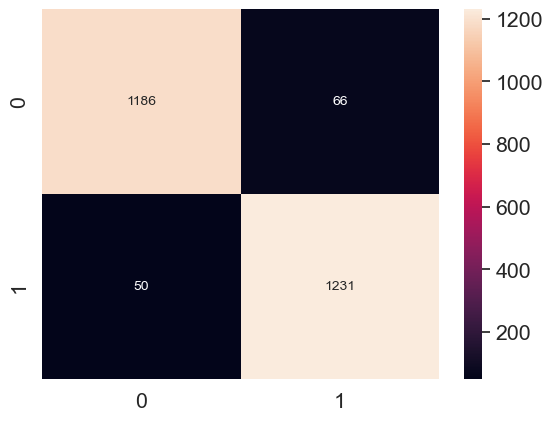

In [9]:
def plot_confussion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

plot_confussion_matrix(test_y, predictions)

In [10]:
print(classification_report(test_y, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.959547  0.947284  0.953376      1252
           1   0.949113  0.960968  0.955004      1281

    accuracy                       0.954205      2533
   macro avg   0.954330  0.954126  0.954190      2533
weighted avg   0.954270  0.954205  0.954199      2533

